### Introduction

There are three files containing data about air traffic, CO2 emission, and pre-departure delays of European airports. Four data visualizations were created based on these data which are air traffic of airports over 6 years, the effect of COVID-19 on air traffic, CO2 emission by states, and the amount of pre-departure delays by airports. To prepare the air traffic data, the missing values were dropped as it meant that there was no data received from the airport operators and I worked only with the data received from network manager. All columns for each dataset were converted to lower case, state names that are not in English were replaced, duplicates were checked and found none. I have realized that airport traffic of Istanbul Ataturk starts going down significantly after 2019 and the data for the air traffic of iGA Istanbul Airport starts from 2019. Apparently, Istanbul Ataturk was replaced by iGA Istanbul Airport. Therefore, I will combine the data of both airports under "Istanbul Airport". Top 10 busiest airports were found by creating a pivot table and data filtered for only those airports. I left the year 2022 out of the analysis as the data aren't complete yet. Data was filtered again using pivot table to find average daily air traffic(arrivals+departures) per airport for each year from 2016-2021 and the values were rounded down. This data was exported on an excel document and sent over to SE student. The analysis showed that until 2020, each airport had a constant amount of air traffic which had not changed over the years. During pandemic, the passenger traffic reduced significantly due to flight restrictions. For COVID analysis, air traffic data was filtered for years 2020 and up and top 10 airports. Pivot table was created to find daily air traffic for each month from January 2020 to July 2022. Line graph was plotted, and following conclusions were made; due to COVID-19, there has been a significant decrease in air traffic all across Europe. Air traffic has slowed down again after each major variant (Delta-Nov 2020, Omicron-Nov 2021). iGA Istanbul Airport, Amsterdam - Schiphol, and Paris-Charles-de-Gaulle have recovered quicker compared to other airports. As of July 2022, London - Heathrow and Madrid - Barajas haven't returned to their pre-COVID days. To prepare the data about delays, all missing values were dropped and worked with the remaining data because replacing them would mess up the data as almost 73% of the data for delays were missing. The missing values could be due to no data entry from the airport operator. A column was created to store average delays per flight. For this column used flt_dep_ifr_2 column was instead of flt_dep_1 column because it comes from the airport operator, same as dly_all_pre_2 values. There are slight differences in some rows between both flt_dep columns as one comes from the network manager and the other is from airport operator. The data was filtered for 2021 because the data from 2022 aren't complete and there weren't many flights during 2020 due to COVID. A Pivot table was created to find airports with most delays and a horizontal bar graph was plotted. The analysis showed that Luxembourg Airport by far had most delays per flight in 2021 with an average of 59 minutes. 5 of the top 15 are German airports meaning that 33% of the delays happen in Germany among the highest ranking. Italy is responsible for 27% of top ranked. For the analysis of CO2 emission data, a column was created to calculate CO2 emission per flight. States that have highest CO2 emission per flight were found. A pivot table was created to find average CO2 emission per flight per state for each year from 2010 to 2022. Columns were created to store the percentage change of CO2 emission and traffic between years as it might be needed for further analysis. The data was filtered for only top 12 states. An area chart was created for each state through faceting. The analysis showed that Luxembourg has the highest CO2 emission among other states and have worsened significantly over time. Cyprus is the only state that has shown a slight improvement. The data shows that most of the states had a little increase in emission before 2020 which went down during 2020 due to COVID-19. The report was sectioned for each analysis to provide easier reading and understanding. 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import math

In [2]:
traffic = pd.read_excel('/Users/betulyildirim/Airport_Traffic.xlsx', sheet_name='DATA')
delays = pd.read_excel('/Users/betulyildirim/All_Pre-Departure_Delay.xlsx', sheet_name='DATA')
co2_emission = pd.read_excel('/Users/betulyildirim/CO2_emissions_by_state.xlsx', sheet_name='DATA')

## Airport Traffic

In [3]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707308 entries, 0 to 707307
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   YEAR           707308 non-null  int64         
 1   MONTH_NUM      707308 non-null  int64         
 2   MONTH_MON      707308 non-null  object        
 3   FLT_DATE       707308 non-null  datetime64[ns]
 4   APT_ICAO       707308 non-null  object        
 5   APT_NAME       707308 non-null  object        
 6   STATE_NAME     707308 non-null  object        
 7   FLT_DEP_1      707308 non-null  int64         
 8   FLT_ARR_1      707308 non-null  int64         
 9   FLT_TOT_1      707308 non-null  int64         
 10  FLT_DEP_IFR_2  213044 non-null  float64       
 11  FLT_ARR_IFR_2  213044 non-null  float64       
 12  FLT_TOT_IFR_2  213044 non-null  float64       
 13  Pivot Label    707308 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(5), object(5

In [4]:
traffic.head(10)

,YEAR,MONTH_NUM,MONTH_MON,FLT_DATE,APT_ICAO,APT_NAME,STATE_NAME,FLT_DEP_1,FLT_ARR_1,FLT_TOT_1,FLT_DEP_IFR_2,FLT_ARR_IFR_2,FLT_TOT_IFR_2,Pivot Label
0,2016,1,JAN,2016-01-01,EBAW,Antwerp,Belgium,4,3,7,NaN,NaN,NaN,Antwerp (EBAW)
1,2016,1,JAN,2016-01-01,EBBR,Brussels,Belgium,174,171,345,174.0,161.0,335.0,Brussels (EBBR)
2,2016,1,JAN,2016-01-01,EBCI,Charleroi,Belgium,45,47,92,45.0,45.0,90.0,Charleroi (EBCI)
3,2016,1,JAN,2016-01-01,EBLG,Liège,Belgium,6,7,13,NaN,NaN,NaN,Liège (EBLG)
4,2016,1,JAN,2016-01-01,EBOS,Ostend-Bruges,Belgium,7,7,14,NaN,NaN,NaN,Ostend-Bruges (EBOS)
5,2016,1,JAN,2016-01-01,EDDB,Berlin - Brandenburg,Germany,98,99,197,NaN,NaN,NaN,Berlin - Brandenburg (EDDB)
6,2016,1,JAN,2016-01-01,EDDC,Dresden,Germany,18,21,39,NaN,NaN,NaN,Dresden (EDDC)
7,2016,1,JAN,2016-01-01,EDDE,Erfurt,Germany,1,1,2,NaN,NaN,NaN,Erfurt (EDDE)
8,2016,1,JAN,2016-01-01,EDDF,Frankfurt,Germany,401,341,742,401.0,306.0,707.0,Frankfurt (EDDF)
9,2016,1,JAN,2016-01-01,EDDG,Muenster-Osnabrueck,Germany,3,4,7,NaN,NaN,NaN,Muenster-Osnabrueck (EDDG)


Finding percentage of missing values in each column:

In [5]:
traffic.isna().sum().div(len(traffic)) * 100

YEAR              0.0000
MONTH_NUM         0.0000
MONTH_MON         0.0000
FLT_DATE          0.0000
APT_ICAO          0.0000
APT_NAME          0.0000
STATE_NAME        0.0000
FLT_DEP_1         0.0000
FLT_ARR_1         0.0000
FLT_TOT_1         0.0000
FLT_DEP_IFR_2    69.8796
FLT_ARR_IFR_2    69.8796
FLT_TOT_IFR_2    69.8796
Pivot Label       0.0000
dtype: float64

The missing values mean that there was no data received from the airport operators. I will remove those columns as they won't be needed in the analysis. 

In [6]:
traffic.drop(['FLT_DEP_IFR_2', 'FLT_ARR_IFR_2', 'FLT_TOT_IFR_2'], axis=1, inplace=True)

In [7]:
traffic.duplicated().sum()

0

Converting all capital letters to lower cases:

In [48]:
traffic.columns = traffic.columns.str.lower()

Replacing the state names that are not in English:

In [116]:
traffic['state_name'].replace('Türkiye', 'Turkey', inplace=True)

Finding top 10 busiest airports:

In [10]:
traffic\
    .pivot_table(index=['apt_name'], values=['flt_dep_1','flt_arr_1','flt_tot_1'])\
    .sort_values(by='flt_tot_1', ascending=False)\
    .apply(np.floor)\
    .head(11)


,flt_arr_1,flt_dep_1,flt_tot_1
apt_name,,,
Amsterdam - Schiphol,576.0,576.0,1152.0
Paris-Charles-de-Gaulle,552.0,553.0,1105.0
Frankfurt,551.0,551.0,1103.0
London - Heathrow,523.0,523.0,1046.0
Madrid - Barajas,453.0,453.0,906.0
Munich,429.0,429.0,859.0
iGA Istanbul Airport,371.0,371.0,742.0
Barcelona,364.0,364.0,729.0
Istanbul Atatürk,327.0,327.0,655.0


I have realized that airport traffic of Istanbul Ataturk starts going down significantly after 2019 and the data for the air traffic of iGA Istanbul Airport starts from 2019. Apparently, Istanbul Ataturk was replaced by iGA Istanbul Airport. Therefore, I will combine the data of both airports under "Istanbul Airport". 

Filtering by the top 10 busisest airports and years:

In [52]:
major_traffic = traffic.query('year < 2022')
major_airports = major_traffic.query('apt_name == "Zürich"\
                             or apt_name == "Amsterdam - Schiphol" \
                             or apt_name == "Paris-Charles-de-Gaulle" \
                             or apt_name == "Frankfurt" \
                             or apt_name == "London - Heathrow" \
                             or apt_name == "Madrid - Barajas" \
                             or apt_name == "Munich" \
                             or apt_name == "iGA Istanbul Airport" \
                             or apt_name == "Barcelona" \
                             or apt_name == "Istanbul Atatürk" \
                             or apt_name == "Rome - Fiumicino"')

In [53]:
major_airports\
    .pivot_table(index=['apt_name', 'year'], values=['flt_dep_1','flt_arr_1','flt_tot_1'])\
    .apply(np.floor)

flt_arr_1  flt_dep_1  flt_tot_1
apt_name             year                                 
Amsterdam - Schiphol 2016      669.0      670.0     1339.0
                     2017      696.0      696.0     1392.0
                     2018      700.0      700.0     1400.0
                     2019      697.0      697.0     1395.0
                     2020      322.0      322.0      644.0
...                              ...        ...        ...
Zürich               2021      172.0      172.0      344.0
iGA Istanbul Airport 2018        4.0        4.0        9.0
                     2019      446.0      446.0      893.0
                     2020      252.0      251.0      504.0
                     2021      380.0      380.0      761.0

[64 rows x 3 columns]

I left out 2022 from the analysis as the data aren't complete yet.

This is the data used for interactive data visualization. The data was copied to an excel document.

## The Effect of COVID-19

In [54]:
traffic_2020 = traffic.query('year >= 2020')
traffic_covid = traffic_2020.query('apt_name == "Zürich"\
                             or apt_name == "Amsterdam - Schiphol" \
                             or apt_name == "Paris-Charles-de-Gaulle" \
                             or apt_name == "Frankfurt" \
                             or apt_name == "London - Heathrow" \
                             or apt_name == "Madrid - Barajas" \
                             or apt_name == "Munich" \
                             or apt_name == "iGA Istanbul Airport" \
                             or apt_name == "Barcelona" \
                             or apt_name == "Rome - Fiumicino"')                             
                            

Filtering the data by monthly total traffic of airports:

In [29]:
data_covid = traffic_covid\
                .pivot_table(index=['year','month_mon'],columns=['apt_name'], values='flt_tot_1', sort=False)\
                .apply(np.floor)
    

data_covid

apt_name        Amsterdam - Schiphol  Barcelona  Frankfurt  London - Heathrow  \
year month_mon                                                                  
2020 JAN                      1238.0      756.0     1173.0             1229.0   
     FEB                      1237.0      792.0     1236.0             1222.0   
     MAR                       832.0      446.0      737.0              844.0   
     APR                       151.0       49.0      217.0              176.0   
     MAY                       203.0       56.0      251.0              223.0   
     JUN                       292.0       91.0      311.0              252.0   
     JUL                       540.0      334.0      496.0              393.0   
     AUG                       776.0      453.0      570.0              498.0   
     SEP                       767.0      349.0      564.0              490.0   
     OCT                       653.0      288.0      552.0              587.0   
     NOV                       512.0      177.0      427.0              388.0   
     DEC                       535.0      230.0      439.0              417.0   
2021 JAN                       489.0      179.0      426.0              327.0   
     FEB                       395.0      142.0      397.0              291.0   
     MAR                       415.0      170.0      442.0              319.0   
     APR                       481.0      212.0      516.0              344.0   
     MAY                       535.0      301.0      548.0              373.0   
     JUN                       681.0      445.0      667.0              454.0   
     JUL                       982.0      637.0      890.0              540.0   
     AUG                      1066.0      705.0      931.0              627.0   
     SEP                      1057.0      694.0      937.0              723.0   
     OCT                      1064.0      646.0      967.0              787.0   
     NOV                       990.0      594.0      962.0              804.0   
     DEC                      1010.0      627.0      901.0              811.0   
2022 JAN                       874.0      502.0      794.0              723.0   
     FEB                       898.0      544.0      797.0              727.0   
     MAR                      1023.0      643.0      868.0              914.0   
     APR                      1167.0      821.0     1077.0             1095.0   
     MAY                      1293.0      860.0     1179.0             1142.0   
     JUN                      1299.0      888.0     1195.0             1169.0   
     JUL                      1225.0      911.0     1129.0             1108.0   

apt_name        Madrid - Barajas  Munich  Paris-Charles-de-Gaulle  \
year month_mon                                                      
2020 JAN                  1073.0   989.0                   1218.0   
     FEB                  1085.0  1013.0                   1232.0   
     MAR                   639.0   557.0                    763.0   
     APR                    83.0    60.0                    142.0   
     MAY                    96.0    66.0                    189.0   
     JUN                   124.0   152.0                    328.0   
     JUL                   344.0   320.0                    615.0   
     AUG                   489.0   395.0                    740.0   
     SEP                   413.0   423.0                    626.0   
     OCT                   367.0   365.0                    544.0   
     NOV                   333.0   216.0                    397.0   
     DEC                   393.0   184.0                    448.0   
2021 JAN                   327.0   158.0                    458.0   
     FEB                   347.0   121.0                    438.0   
     MAR                   367.0   165.0                    457.0   
     APR                   405.0   217.0                    475.0   
     MAY                   453.0   264.0                    492.0   
     JUN       

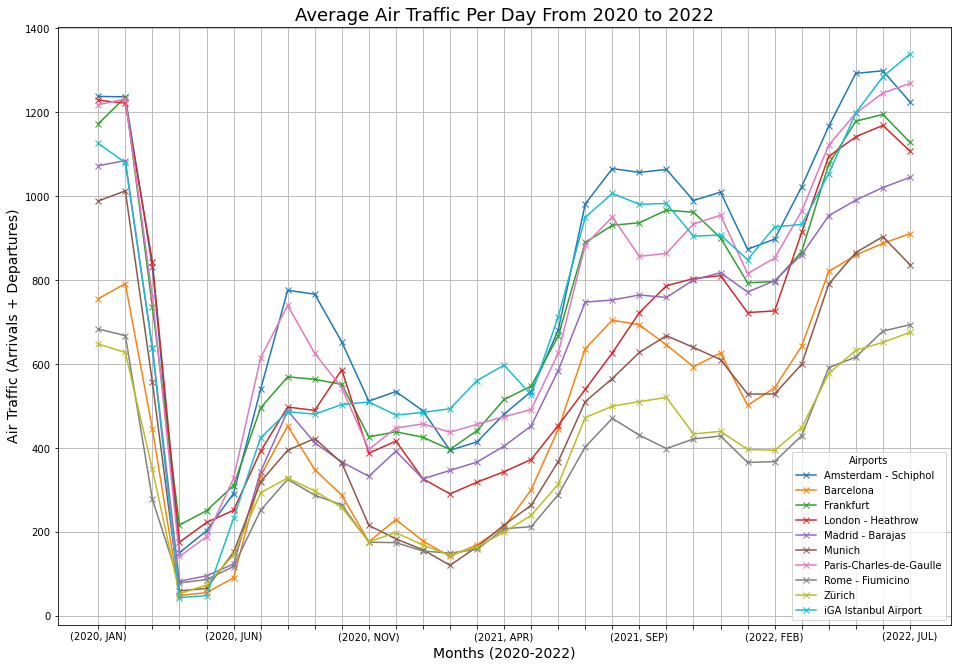

In [66]:
data_covid.plot(kind='line',figsize=(16,11), grid=True, marker='x')

plt.xticks(np.arange(len(data_covid)))
plt.xlabel('Months (2020-2022)', fontsize= 14)
plt.ylabel('Air Traffic (Arrivals + Departures)',fontsize= 14)
plt.title('Average Air Traffic Per Day From 2020 to 2022',fontsize= 18)
plt.legend(title = 'Airports')
plt.show()

Figure 2: Average daily air traffic of top 10 busiest airports in Europe from January 2020 to July 2022. Due to COVID-19, there has been a significant decrease in air traffic all across Europe. Air traffic has slowed down again after each major variant (Delta-Nov 2020, Omicron-Nov 2021). iGA Istanbul Airport, Amsterdam - Schiphol, and Paris-Charles-de-Gaulle have recovered quicker compared to other airports. As of July 2022, London - Heathrow and Madrid - Barajas haven't returned to their pre-COVID days.

## Delays

In [47]:
delays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276495 entries, 0 to 276494
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   YEAR           276495 non-null  int64         
 1   MONTH_NUM      276495 non-null  int64         
 2   MONTH_MON      276495 non-null  object        
 3   FLT_DATE       276495 non-null  datetime64[ns]
 4   APT_ICAO       276495 non-null  object        
 5   APT_NAME       276495 non-null  object        
 6   STATE_NAME     276495 non-null  object        
 7   FLT_DEP_1      276495 non-null  int64         
 8   FLT_DEP_IFR_2  77215 non-null   float64       
 9   DLY_ALL_PRE_2  77215 non-null   float64       
 10  Pivot Label    276495 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 23.2+ MB


In [ ]:
delays.head(10)

In [71]:
delays.isna().sum().div(len(delays)) * 100

year              0.000000
month_num         0.000000
month_mon         0.000000
flt_date          0.000000
apt_icao          0.000000
apt_name          0.000000
state_name        0.000000
flt_dep_1         0.000000
flt_dep_ifr_2    72.073636
dly_all_pre_2    72.073636
pivot label       0.000000
dtype: float64

In [72]:
delays.columns = delays.columns.str.lower()

In [73]:
delays.duplicated().sum()

0

In [74]:
delays['state_name'].replace('Türkiye', 'Turkey', inplace=True)

I will drop all missing values and continue with the data that's left. The missing values could be due to no data entry from the airport operator. 

In [76]:
delays.dropna(inplace=True)

Creating a column to store average delays per flight:

There are slight differences in some rows between both flt_dep columns as one comes from the network operator and the other is from airport operator. Therefore, I used flt_dep_ifr_2 column instead of flt_dep_1 column because it comes from the airport operator, same as dly_all_pre_2 values. 

In [78]:
delays['average_delays'] = delays['dly_all_pre_2'] / delays['flt_dep_ifr_2']

Filtering data for only 2021 beacuse the data from 2022 aren't complete and there weren't many flights during 2020 due to COVID:

In [79]:
delays_2021 = delays.query('year == 2021')

In [80]:
delays_2021

,year,month_num,month_mon,flt_date,apt_icao,apt_name,state_name,flt_dep_1,flt_dep_ifr_2,dly_all_pre_2,pivot label,average_delays
107311,2021,1,JAN,2021-01-01,EBBR,Brussels,Belgium,57,57.0,890.00,Brussels (EBBR),15.614035
107312,2021,1,JAN,2021-01-01,EBCI,Charleroi,Belgium,27,27.0,54.00,Charleroi (EBCI),2.000000
107315,2021,1,JAN,2021-01-01,EDDB,Berlin - Brandenburg,Germany,45,45.0,343.99,Berlin - Brandenburg (EDDB),7.644222
107317,2021,1,JAN,2021-01-01,EDDF,Frankfurt,Germany,144,144.0,1544.53,Frankfurt (EDDF),10.725903
107318,2021,1,JAN,2021-01-01,EDDG,Muenster-Osnabrueck,Germany,1,1.0,3.00,Muenster-Osnabrueck (EDDG),3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
220020,2021,12,DEC,2021-12-31,LROP,Bucharest - Otopeni,Romania,88,88.0,595.00,Bucharest - Otopeni (LROP),6.761364
220021,2021,12,DEC,2021-12-31,LSGG,Geneva,Switzerland,173,172.0,712.45,Geneva (LSGG),4.142151
220023,2021,12,DEC,2021-12-31,LSZH,Zürich,Switzerland,196,196.0,1573.74,Zürich (LSZH),8.029286
220029,2021,12,DEC,2021-12-31,LTFM,iGA Istanbul Airport,Turkey,445,452.0,4576.00,iGA Istanbul Airport (LTFM),10.123894


Finding airports with most delays:

In [81]:
most_delays = delays_2021\
    .pivot_table(index=['apt_name','state_name'], values=['average_delays'])\
    .round(2)\
    .sort_values(by='average_delays', ascending=False)

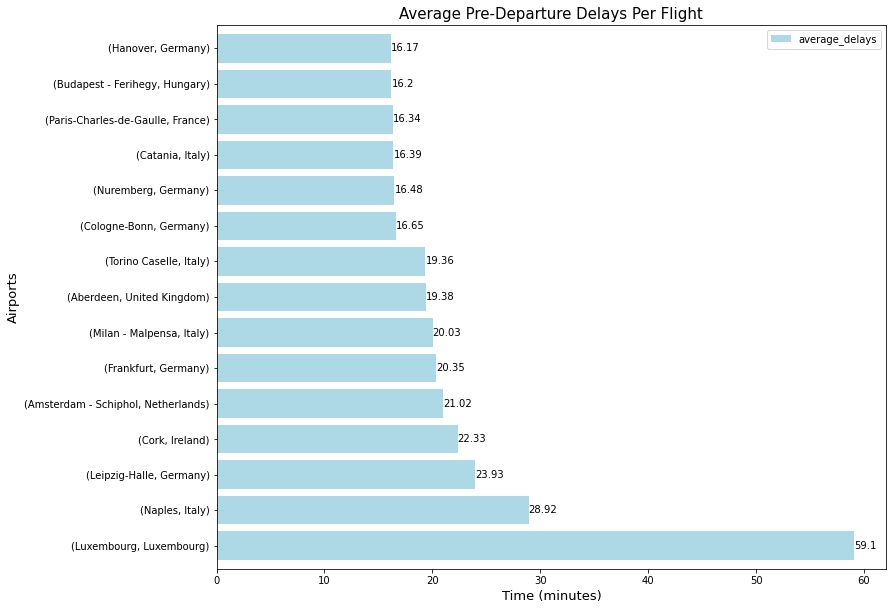

In [111]:
ax = most_delays\
        .head(15)\
        .plot(
            kind = 'barh',
            label = 'Average Delays',
            width = 0.8,
            figsize = (12,10),
            color ='lightblue'
            )

for i in ax.containers:
    ax.bar_label(i)

ax.set_xlabel('Time (minutes)', fontsize=13)
ax.set_ylabel('Airports', fontsize=13)
ax.set_title('Average Pre-Departure Delays Per Flight', fontsize= 15)
plt.show()

Figure 1: Average pre-departure delays of top 15 airports with most delays per flight in 2021. Luxembourg Airport by far had most delays per flight in 2021 with an average of 59 minutes. 5 of the top 15 are German airports meaning that 33% of the delays happen in Germany among the highest ranking. Italy is responsible for 27% of top ranked. 

## CO2 Emission

In [93]:
co2_emission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6468 entries, 0 to 6467
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   YEAR            6468 non-null   int64  
 1   MONTH           6468 non-null   int64  
 2   STATE_NAME      6468 non-null   object 
 3   STATE_CODE      6468 non-null   object 
 4   CO2_QTY_TONNES  6468 non-null   float64
 5   TF              6468 non-null   int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 303.3+ KB


In [94]:
co2_emission.head(10)


,YEAR,MONTH,STATE_NAME,STATE_CODE,CO2_QTY_TONNES,TF
0,2010,1,ALBANIA,LA,8318.420,821
1,2010,1,ARMENIA,UD,13456.676,662
2,2010,1,AUSTRIA,LO,171535.234,14972
3,2010,1,BELGIUM,EB,309092.823,11546
4,2010,1,BOSNIA AND HERZEGOVINA,LQ,2887.995,478
5,2010,1,BULGARIA,LB,34760.876,2177
6,2010,1,CANARY ISLANDS,GC,254688.439,13494
7,2010,1,CROATIA,LD,12141.849,1956
8,2010,1,CYPRUS,LC,47704.344,1789
9,2010,1,CZECHIA,LK,68318.753,6256


In [95]:
co2_emission.columns = co2_emission.columns.str.lower()

In [96]:
co2_emission['state_name'].replace('Türkiye', 'TURKEY', inplace=True)

Creating a column to calculate CO2 emission per flight:

In [97]:
co2_emission['co2_per_flight'] = (co2_emission['co2_qty_tonnes'] / co2_emission['tf'])

Finding states that have highest CO2 emission per flight :

In [98]:
co2_emission\
    .pivot_table(index=['state_name'], values=['co2_per_flight'])\
    .round(2)\
    .sort_values(by='co2_per_flight', ascending=False)\
    .head(12)
   

,co2_per_flight
state_name,
LUXEMBOURG,50.67
NETHERLANDS,36.34
BELGIUM,28.99
UNITED KINGDOM*,28.93
CYPRUS,26.24
GERMANY,25.87
TURKEY,22.29
GEORGIA,21.84
FRANCE,21.01


In [99]:
highest_emission = co2_emission\
                        .pivot_table(index=['state_name','year'], values=['co2_per_flight','tf', 'co2_qty_tonnes'])\
                        .round(2)
highest_emission

co2_per_flight  co2_qty_tonnes         tf
state_name      year                                           
ALBANIA         2010            9.68         8521.84     872.33
                2011            9.76         9398.50     955.92
                2012            9.39         8056.06     855.33
                2013            9.61         7997.14     829.67
                2014           10.51         7941.13     752.00
...                              ...             ...        ...
UNITED KINGDOM* 2018           29.43      3080090.96  104854.17
                2019           29.86      3105030.11  104241.00
                2020           32.55      1246892.95   41301.42
                2021           29.92      1150475.87   42001.92
                2022           28.05      2065470.42   74739.00

[568 rows x 3 columns]

Finding percentage change of CO2 emission and traffic between years:

In [100]:
highest_emission['co2_growth(%)'] = highest_emission['co2_qty_tonnes'].pct_change()
highest_emission['traffic_growth(%)'] = highest_emission['tf'].pct_change()

In [101]:
top_emission = highest_emission.query('state_name == "LUXEMBOURG"\
                                  or state_name == "NETHERLANDS"\
                                  or state_name == "BELGIUM"\
                                  or state_name == "UNITED KINGDOM*"\
                                  or state_name == "CYPRUS"\
                                  or state_name == "GERMANY"\
                                  or state_name == "TURKEY"\
                                  or state_name == "GEORGIA"\
                                  or state_name == "FRANCE"\
                                  or state_name == "PORTUGAL*"\
                                  or state_name == "ARMENIA"\
                                  or state_name == "SWITZERLAND"'
                                  )


In [103]:
top_emission.reset_index(inplace=True)

In [104]:
top_emission

,state_name,year,co2_per_flight,co2_qty_tonnes,tf,co2_growth(%),traffic_growth(%)
0,ARMENIA,2010,20.39,17567.43,860.50,-0.058778,-0.380490
1,ARMENIA,2011,20.36,17755.90,872.50,0.010728,0.013945
2,ARMENIA,2012,20.57,18474.80,895.75,0.040488,0.026648
3,ARMENIA,2013,20.41,15813.62,774.25,-0.144044,-0.135641
4,ARMENIA,2014,20.00,17924.37,895.83,0.133477,0.157029
...,...,...,...,...,...,...,...
151,UNITED KINGDOM*,2018,29.43,3080090.96,104854.17,0.016213,-0.005644
152,UNITED KINGDOM*,2019,29.86,3105030.11,104241.00,0.008097,-0.005848
153,UNITED KINGDOM*,2020,32.55,1246892.95,41301.42,-0.598428,-0.603789
154,UNITED KINGDOM*,2021,29.92,1150475.87,42001.92,-0.077326,0.016961


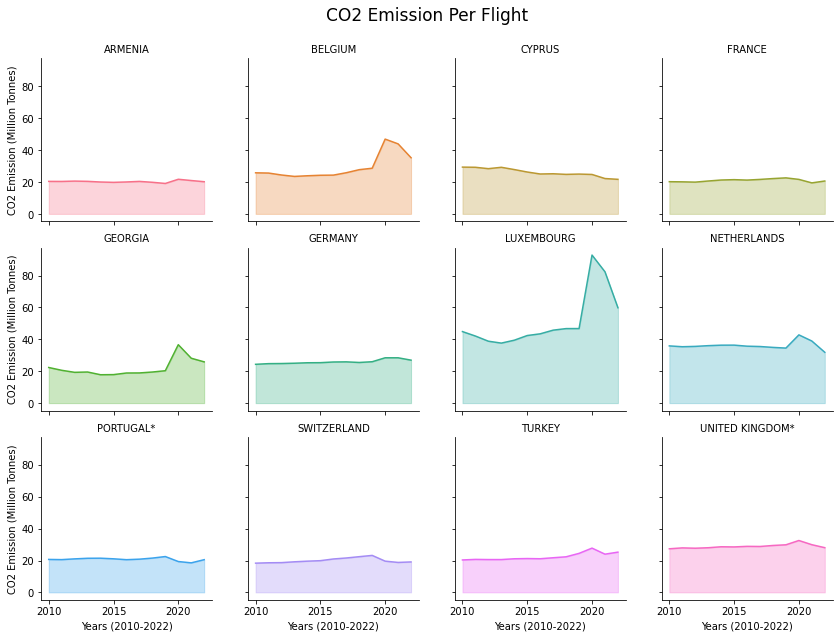

In [114]:
data = sns.FacetGrid(top_emission, col='state_name', hue='state_name', col_wrap=4)


data = data.map(plt.plot, 'year', 'co2_per_flight')


data = data\
        .map(plt.fill_between, 'year', 'co2_per_flight', alpha=0.3)\
        .set_titles('{col_name}')


for i in data.axes.flat:
    i.set_xlabel("Years (2010-2022)", fontsize=10)
    i.set_ylabel('CO2 Emission (Million Tonnes)', fontsize=10)
    
plt.subplots_adjust(top=0.90)
data = data.fig.suptitle('CO2 Emission Per Flight', fontsize=17)


plt.show()


Figure 3: CO2 emission(in million tonnes) per flight by top 12 states with the highest emission from 2010 to 2022. Luxembourg has the highest CO2 emission among other states and have worsened significantly over time. Cyprus is the only state that has shown a slight improvement. The data shows that most of the states had a little increase in emission before 2020 which went down during 2020 due to COVID-19. 

(Interactive) Figure 4: Daily air traffic of top 10 busiest airports in Europe from 2016 to 2021. Until 2020, each airport had a constant amount of air traffic which had not changed over the years. During pandemic, the passenger traffic reduced significantly due to flight restrictions. As of 2021, air traffic in Europe has yet to recover fully. 

 ### Conclusion

Further analysis can be done to explore the increase in CO2 emission in most of the states right before 2020. The percentage of emission growth and traffic growth can be compared to understand the correlation between the two. A new analysis could also be done comparing the air traffic of states instead of airports and a choropleth map could be created to visualize geospatial data. 